## Langkah:
- Load dataset MNIST dari Keras.
- Bangun model dengan 2 hidden layer.
- Latih model dan evaluasi akurasi.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi data (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Bangun model JST
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Ubah gambar 28x28 menjadi vektor 784
    Dense(128, activation='relu'),   # Hidden layer 1
    Dense(64, activation='relu'),    # Hidden layer 2
    Dense(10, activation='softmax')  # Output layer (10 kelas)
])

# 3. Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Latih model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

# 5. Evaluasi model
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi pada data uji: {acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
Epoch 1/10


l:\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.3693 - val_accuracy: 0.9451 - val_loss: 0.1883
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.3693 - val_accuracy: 0.9451 - val_loss: 0.1883
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9558 - loss: 0.1484 - val_accuracy: 0.9592 - val_loss: 0.1325
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9558 - loss: 0.1484 - val_accuracy: 0.9592 - val_loss: 0.1325
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1026 - val_accuracy: 0.9681 - val_loss: 0.1065
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1026 - val_accuracy: 0.9681 - val_loss: 0.1065
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0772 - val_accuracy: 0.9681 - val_loss: 0.1025
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0772 - val_accuracy: 0.9681 - val_

## Coba dengan beberapa parameter lain:
- Ubah jumlah neuron di hidden layer (misal: 256 dan 128).
- Tambahkan satu hidden layer lagi.
- Bandingkan akurasi dan waktu pelatihan.
- Eksperimen dengan fungsi aktivasi Sigmoid vs ReLU.

EKSPERIMEN 1: Variasi Jumlah Neuron

--- Konfigurasi [256, 128] neurons ---
Akurasi: 0.9781, Waktu: 10.70s

--- Konfigurasi [512, 256] neurons ---
Akurasi: 0.9781, Waktu: 10.70s

--- Konfigurasi [512, 256] neurons ---
Akurasi: 0.9749, Waktu: 16.92s

EKSPERIMEN 2: Tambah Hidden Layer

--- 3 Hidden Layers: [256, 128, 64] ---
Akurasi: 0.9749, Waktu: 16.92s

EKSPERIMEN 2: Tambah Hidden Layer

--- 3 Hidden Layers: [256, 128, 64] ---
Akurasi: 0.9773, Waktu: 11.24s

EKSPERIMEN 3: Sigmoid vs ReLU

--- Sigmoid Activation ---
Akurasi: 0.9773, Waktu: 11.24s

EKSPERIMEN 3: Sigmoid vs ReLU

--- Sigmoid Activation ---
Akurasi: 0.9720, Waktu: 8.57s
Akurasi: 0.9720, Waktu: 8.57s


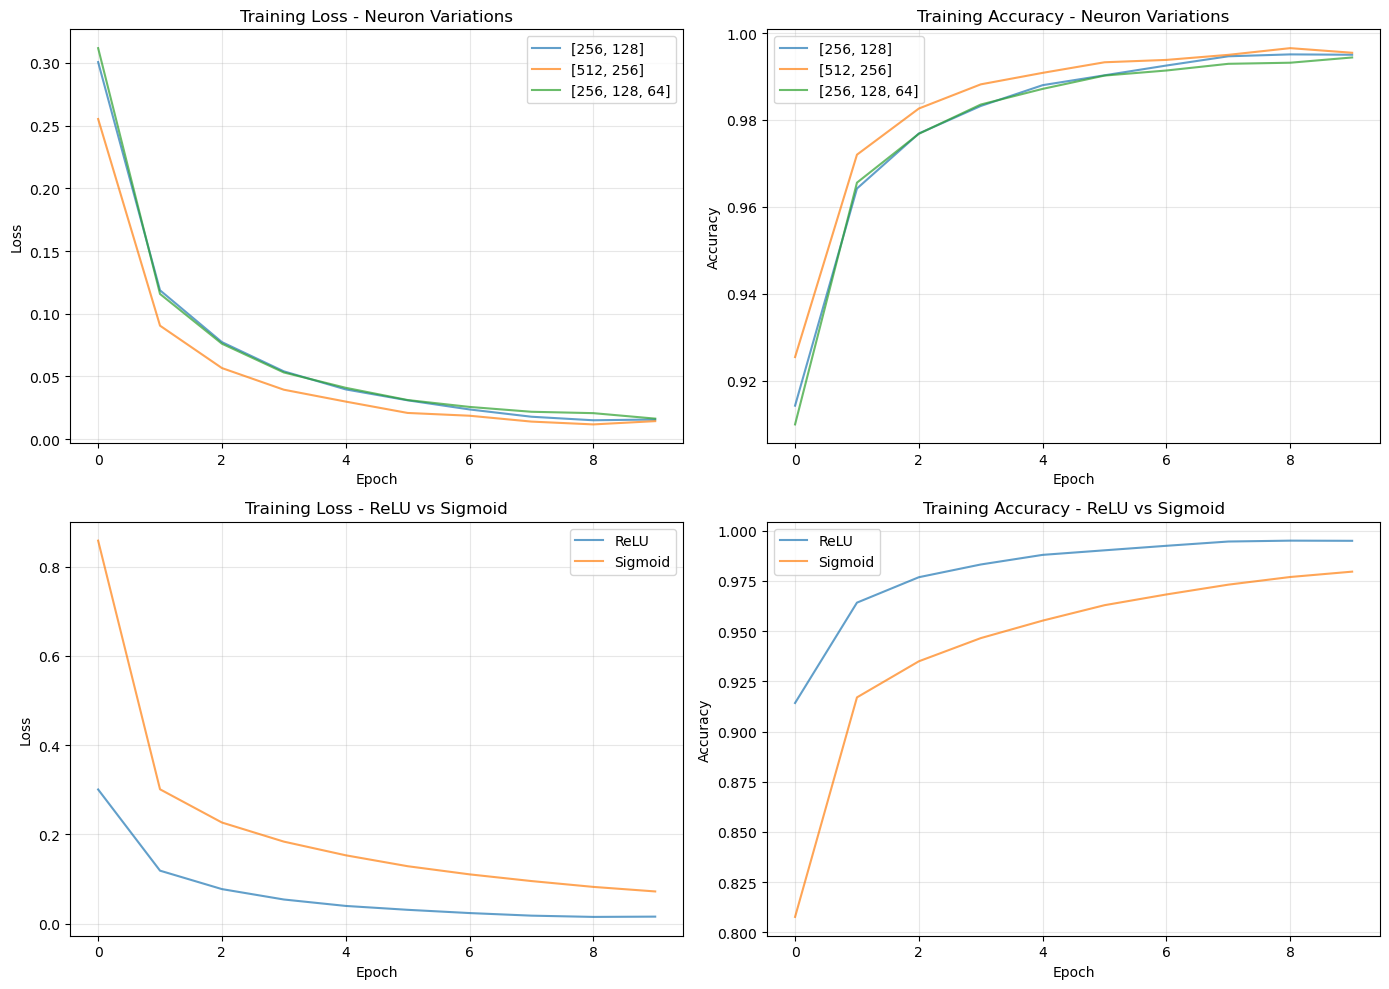


RINGKASAN HASIL

[256, 128]:      Akurasi = 0.9781, Waktu = 10.70s
[512, 256]:      Akurasi = 0.9749, Waktu = 16.92s
[256, 128, 64]:  Akurasi = 0.9773, Waktu = 11.24s
Sigmoid [128,64]: Akurasi = 0.9720, Waktu = 8.57s

KESIMPULAN:
1. Menambah neuron meningkatkan kapasitas model tetapi juga waktu training
2. Menambah hidden layer dapat meningkatkan akurasi pada data kompleks
3. ReLU umumnya lebih cepat konvergen dibanding Sigmoid
4. Sigmoid rentan terhadap vanishing gradient pada deep networks


In [2]:
import time
import matplotlib.pyplot as plt

print("=" * 60)
print("EKSPERIMEN 1: Variasi Jumlah Neuron")
print("=" * 60)

# Konfigurasi 1: [256, 128]
print("\n--- Konfigurasi [256, 128] neurons ---")
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
time1 = time.time() - start

loss1, acc1 = model1.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi: {acc1:.4f}, Waktu: {time1:.2f}s")

# Konfigurasi 2: [512, 256]
print("\n--- Konfigurasi [512, 256] neurons ---")
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
time2 = time.time() - start

loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi: {acc2:.4f}, Waktu: {time2:.2f}s")

print("\n" + "=" * 60)
print("EKSPERIMEN 2: Tambah Hidden Layer")
print("=" * 60)

print("\n--- 3 Hidden Layers: [256, 128, 64] ---")
model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history3 = model3.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
time3 = time.time() - start

loss3, acc3 = model3.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi: {acc3:.4f}, Waktu: {time3:.2f}s")

print("\n" + "=" * 60)
print("EKSPERIMEN 3: Sigmoid vs ReLU")
print("=" * 60)

print("\n--- Sigmoid Activation ---")
model_sigmoid = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
time_sigmoid = time.time() - start

loss_sigmoid, acc_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi: {acc_sigmoid:.4f}, Waktu: {time_sigmoid:.2f}s")

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loss comparison - Neuron variations
axes[0, 0].plot(history1.history['loss'], label='[256, 128]', alpha=0.7)
axes[0, 0].plot(history2.history['loss'], label='[512, 256]', alpha=0.7)
axes[0, 0].plot(history3.history['loss'], label='[256, 128, 64]', alpha=0.7)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training Loss - Neuron Variations')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Accuracy comparison - Neuron variations
axes[0, 1].plot(history1.history['accuracy'], label='[256, 128]', alpha=0.7)
axes[0, 1].plot(history2.history['accuracy'], label='[512, 256]', alpha=0.7)
axes[0, 1].plot(history3.history['accuracy'], label='[256, 128, 64]', alpha=0.7)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Training Accuracy - Neuron Variations')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Loss comparison - Activation functions
axes[1, 0].plot(history1.history['loss'], label='ReLU', alpha=0.7)
axes[1, 0].plot(history_sigmoid.history['loss'], label='Sigmoid', alpha=0.7)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].set_title('Training Loss - ReLU vs Sigmoid')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Accuracy comparison - Activation functions
axes[1, 1].plot(history1.history['accuracy'], label='ReLU', alpha=0.7)
axes[1, 1].plot(history_sigmoid.history['accuracy'], label='Sigmoid', alpha=0.7)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Training Accuracy - ReLU vs Sigmoid')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ringkasan hasil
print("\n" + "=" * 60)
print("RINGKASAN HASIL")
print("=" * 60)
print(f"\n[256, 128]:      Akurasi = {acc1:.4f}, Waktu = {time1:.2f}s")
print(f"[512, 256]:      Akurasi = {acc2:.4f}, Waktu = {time2:.2f}s")
print(f"[256, 128, 64]:  Akurasi = {acc3:.4f}, Waktu = {time3:.2f}s")
print(f"Sigmoid [128,64]: Akurasi = {acc_sigmoid:.4f}, Waktu = {time_sigmoid:.2f}s")

print("\nKESIMPULAN:")
print("1. Menambah neuron meningkatkan kapasitas model tetapi juga waktu training")
print("2. Menambah hidden layer dapat meningkatkan akurasi pada data kompleks")
print("3. ReLU umumnya lebih cepat konvergen dibanding Sigmoid")
print("4. Sigmoid rentan terhadap vanishing gradient pada deep networks")